I estimate here what is the "probability" of various outcomes (e.g., adoption, euthanasia) as a function of animal age, gender, and breed.
I treat dogs and cats separately in all cases.
Probability is in quotation marks because what I calculate is fractions (nr. of animals with given age and outcome / nr. of animals with given age) and not real probabilities.

The breed feature is difficult to work with and I'm not sure I'm doing the best thing. There are mix breeds (e.g., Plott Hound/Boxer - separated with /) and there are breeds with Mix in their names (e.g., German Shepherd Mix).
For now, I identified all unique breeds: Plott Hound, Boxer, German Shepherd, and Mix are the 4 unique breeds in the examples above. For each breed entry, I check which unique breeds are present, and use all hits to calculate the fractions. That is, mixed breed animals are counted more than once.

What I found:

- Young dogs (older than a month) are likely adopted.
- Old dogs are likely returned to their owner.
- Young (older than a month) and old cats are likely adopted.
- Old cats are likely euthanised.
- Dogs in general are more likely to be returned to their owner than cats.
- Some small dogs (e.g., Shin Tzus, Lhasa Apsos, Pekingese) have a very low adoption probability (~10% while the average is ~40%). 
- Dogs percieved agressive (Pit Bulls, Bull Dogs, Siberian Huskies, Rottweilers) also have a lower than average adoption probability (~30%).
- Neutered males and spayed females are much more likely to get adopted. 

The last point is potentially actionable!

- If it is possible and not too expensive to neuter/spay the incoming animals, their probability of adoption could go from ~5% to ~50% for dogs and more than 60% for cats. 

One of the figures also show that cats with names are 4 times more likely to get adopted. This correlation was intriguing and potentially actionable (give name to cats to boost their adoption rate), but it is explained by the large number of neonatal cats who are unnamed and not adoptable. See Fig. 1 of my blog post for more details:

https://www.kaggle.com/c/shelter-animal-outcomes/forums/t/22538/solution-of-team-kaggle-for-the-paws-no-outcome-datetime-features

Please also check out my other scripts:

The solution of my team (Kaggle for the paws) is described here (git repo is available there):

https://www.kaggle.com/c/shelter-animal-outcomes/forums/t/22538/solution-of-team-kaggle-for-the-paws-no-outcome-datetime-features

I group dog breeds into dog groups (e.g., herding, sporting, toy). This conversion reduces the number of categories and provides new insigths into the problem.

https://www.kaggle.com/andraszsom/shelter-animal-outcomes/dog-breeds-dog-groups

I calculate uncertainty estimates (confidence intervals) for the outcome types. The main question I answer there is this: what is the confidence interval of the true outcome probabilities based on the observed probabilities?   

https://www.kaggle.com/andraszsom/shelter-animal-outcomes/uncertainty-estimates-of-outcome-types

Let's start!


Question 1: What fraction of animals end up with the various outcomes as a function of the animal's age?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})

Function to convert age to days:

In [2]:
def age_to_days(item):
    # convert item to list if it is one string
    if type(item) is str:
        item = [item]
    ages_in_days = np.zeros(len(item))
    for i in range(len(item)):
        # check if item[i] is str
        if type(item[i]) is str:
            if 'day' in item[i]:
                ages_in_days[i] = int(item[i].split(' ')[0])
            if 'week' in item[i]:
                ages_in_days[i] = int(item[i].split(' ')[0])*7
            if 'month' in item[i]:
                ages_in_days[i] = int(item[i].split(' ')[0])*30
            if 'year' in item[i]:
                ages_in_days[i] = int(item[i].split(' ')[0])*365    
        else:
            # item[i] is not a string but a nan
            ages_in_days[i] = 0
    return ages_in_days

Load the data:

In [3]:
df = pd.read_csv('data/train.csv', sep=',')

feature = 'AgeuponOutcome'
feature_values_dog = np.array(df.loc[df['AnimalType'] == 'Dog',feature])
outcome_dog = np.array(df.loc[df['AnimalType'] == 'Dog','OutcomeType'])

feature_values_cat = np.array(df.loc[df['AnimalType'] == 'Cat',feature])
outcome_cat = np.array(df.loc[df['AnimalType'] == 'Cat','OutcomeType'])

Calculate the fractions of outcomes:

In [4]:
ages_dog = age_to_days(feature_values_dog)
ages_cat = age_to_days(feature_values_cat)

unique_ages = np.unique(np.append(ages_dog,ages_cat))
unique_outcomes = np.unique(np.append(outcome_dog,outcome_cat))

fractions_cat = np.zeros([len(unique_ages),len(unique_outcomes)])
fractions_dog = np.zeros([len(unique_ages),len(unique_outcomes)])
nr_animals_with_age_dog = np.zeros(len(unique_ages))
nr_animals_with_age_cat = np.zeros(len(unique_ages))

for i in range(len(unique_ages)):
    for j in range(len(unique_outcomes)):
        sublist_dog = outcome_dog[ages_dog == unique_ages[i]]  
        if len(sublist_dog) > 0:
            fractions_dog[i,j] = 1e0*len(sublist_dog[sublist_dog == unique_outcomes[j]]) / len(sublist_dog)
        else:
            fractions_dog[i,j] = 0e0
        sublist_cat = outcome_cat[ages_cat == unique_ages[i]]        
        fractions_cat[i,j] = 1e0*len(sublist_cat[sublist_cat == unique_outcomes[j]]) / len(sublist_cat)
        
    nr_animals_with_age_dog[i] = len(sublist_dog)
    nr_animals_with_age_cat[i] = len(sublist_cat)

Figures:

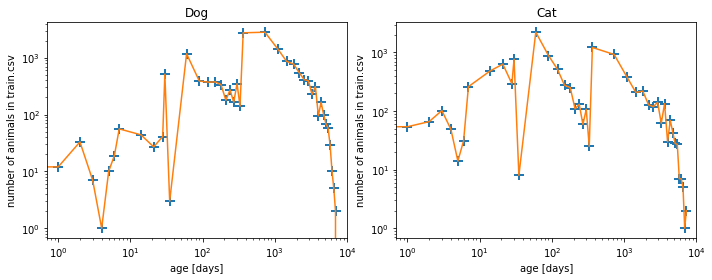

In [5]:
# nr of animals vs age
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('Dog')
plt.plot(unique_ages,nr_animals_with_age_dog,'+',markersize=10,mew=2)
plt.plot(unique_ages,nr_animals_with_age_dog)
plt.xlim([0.7,1e4])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('age [days]')
plt.ylabel('number of animals in train.csv')
plt.tight_layout(w_pad=0, h_pad=0)

plt.subplot(1, 2, 2)
plt.title('Cat')
plt.plot(unique_ages,nr_animals_with_age_cat,'+',markersize=10,mew=2)
plt.plot(unique_ages,nr_animals_with_age_cat)
plt.xlim([0.7,1e4])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('age [days]')
plt.ylabel('number of animals in train.csv')
plt.tight_layout(w_pad=0, h_pad=0)
plt.savefig('age-vs-nr_points.jpg',dpi=150)
plt.show()
plt.close()


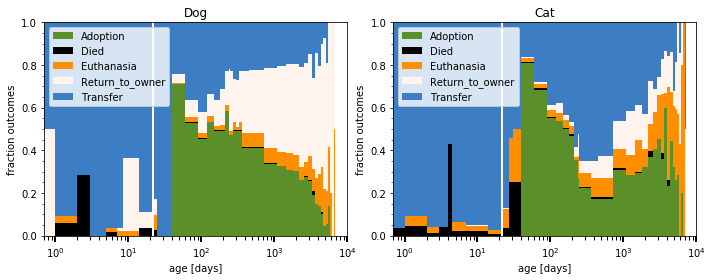

In [6]:
# fraction of outcomes

ages_for_axis = np.append(unique_ages,age_to_days('20 years'))

left = (ages_for_axis[1:-1] + ages_for_axis[:-2])/2e0
right = (ages_for_axis[1:-1] + ages_for_axis[2:])/2e0
width = right-left

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.title('Dog')
plt.xlabel('age [days]')
plt.ylabel('fraction outcomes')
plt.xscale('log')
plt.xlim([0.7,1e4])
plt1 = plt.bar(left, fractions_dog[1:,0], width,color='#5A8F29',edgecolor='none')
plt2 = plt.bar(left, fractions_dog[1:,1], width,color='k',bottom = np.sum(fractions_dog[1:,:1],axis=1),edgecolor='none')
plt3 = plt.bar(left, fractions_dog[1:,2], width,color='#FF8F00',bottom = np.sum(fractions_dog[1:,:2],axis=1),edgecolor='none')
plt4 = plt.bar(left, fractions_dog[1:,3], width,color='#FFF5EE',bottom = np.sum(fractions_dog[1:,:3],axis=1),edgecolor='none')
plt5 = plt.bar(left, fractions_dog[1:,4], width,color='#3C7DC4',bottom = np.sum(fractions_dog[1:,:4],axis=1),edgecolor='none')
plt.legend([plt1,plt2,plt3,plt4,plt5],unique_outcomes,loc=2,fontsize=10)
plt.tight_layout(w_pad=0, h_pad=0)
plt.tick_params(axis='x', length=6, which='major',width=2)
plt.tick_params(axis='x', length=4, which='minor',width=1)
plt.minorticks_on()
plt.tight_layout(w_pad=0, h_pad=0)

plt.subplot(1, 2, 2)
plt.title('Cat')
plt.xlabel('age [days]')
plt.ylabel('fraction outcomes')
plt.xscale('log')
plt.xlim([0.7,1e4])
plt1 = plt.bar(left, fractions_cat[1:,0], width,color='#5A8F29',edgecolor='none')
plt2 = plt.bar(left, fractions_cat[1:,1], width,color='k',bottom = np.sum(fractions_cat[1:,:1],axis=1),edgecolor='none')
plt3 = plt.bar(left, fractions_cat[1:,2], width,color='#FF8F00',bottom = np.sum(fractions_cat[1:,:2],axis=1),edgecolor='none')
plt4 = plt.bar(left, fractions_cat[1:,3], width,color='#FFF5EE',bottom = np.sum(fractions_cat[1:,:3],axis=1),edgecolor='none')
plt5 = plt.bar(left, fractions_cat[1:,4], width,color='#3C7DC4',bottom = np.sum(fractions_cat[1:,:4],axis=1),edgecolor='none')
plt.legend([plt1,plt2,plt3,plt4,plt5],unique_outcomes,loc=2,fontsize=10)
plt.tight_layout(w_pad=0, h_pad=0)
plt.tick_params(axis='x', length=6, which='major',width=2)
plt.tick_params(axis='x', length=4, which='minor',width=1)
plt.minorticks_on()
plt.tight_layout(w_pad=0, h_pad=0)
plt.savefig('age-vs-outcome.jpg',dpi=150)
plt.show()
plt.close()

- Young dogs (older than a month) are likely adopted.
- Old dogs are likely returned to their owner.
- Young (older than a month) and old cats are likely adopted.
- Old cats are likely euthanised.

Question 2: What fraction of animals end up adopted/euthanised etc. vs. their gender?

In [7]:
feature = 'SexuponOutcome'

feature_values_dog = np.array(df.loc[df['AnimalType'] == 'Dog',feature])
outcome_dog = np.array(df.loc[df['AnimalType'] == 'Dog','OutcomeType'])

feature_values_cat = np.array(df.loc[df['AnimalType'] == 'Cat',feature])
outcome_cat = np.array(df.loc[df['AnimalType'] == 'Cat','OutcomeType'])

unique_sexes = np.unique(feature_values_cat)
unique_outcomes = np.unique(np.append(outcome_dog,outcome_cat))

fractions_cat = np.zeros([len(unique_sexes),len(unique_outcomes)])
fractions_dog = np.zeros([len(unique_sexes),len(unique_outcomes)])
nr_animals_with_sex_dog = np.zeros(len(unique_sexes))
nr_animals_with_sex_cat = np.zeros(len(unique_sexes))

for i in range(len(unique_sexes)):
    for j in range(len(unique_outcomes)):
        sublist_dog = outcome_dog[feature_values_dog == unique_sexes[i]]  
        if len(sublist_dog) > 0:
            fractions_dog[i,j] = 1e0*len(sublist_dog[sublist_dog == unique_outcomes[j]]) / len(sublist_dog)
        else:
            fractions_dog[i,j] = 0e0
        sublist_cat = outcome_cat[feature_values_cat == unique_sexes[i]]        
        fractions_cat[i,j] = 1e0*len(sublist_cat[sublist_cat == unique_outcomes[j]]) / len(sublist_cat)
        
    nr_animals_with_sex_dog[i] = len(sublist_dog)
    nr_animals_with_sex_cat[i] = len(sublist_cat)
    

Plots:

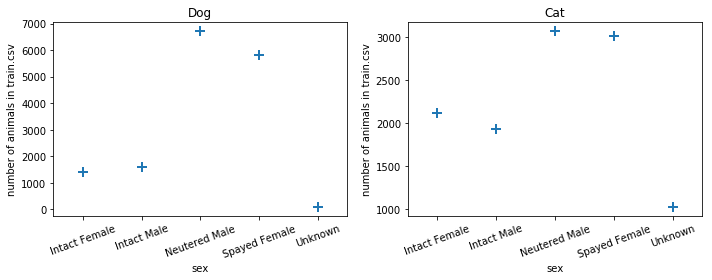

In [8]:

# nr of animals with given sexes

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('Dog')
plt.xlim([-0.5,4.5])
plt.plot(range(len(unique_sexes)),nr_animals_with_sex_dog,'+',markersize=10,mew=2)
plt.xticks(range(len(unique_sexes)), unique_sexes, rotation=20)
plt.xlabel('sex')
plt.ylabel('number of animals in train.csv')

plt.subplot(1, 2, 2)
plt.title('Cat')
plt.xlim([-0.5,4.5])
plt.plot(range(len(unique_sexes)),nr_animals_with_sex_cat,'+',markersize=10,mew=2)
plt.xticks(range(len(unique_sexes)), unique_sexes, rotation=20)
plt.xlabel('sex')
plt.ylabel('number of animals in train.csv')
plt.tight_layout()
plt.savefig('gender-vs-nr_points.jpg',dpi=150)
plt.show()


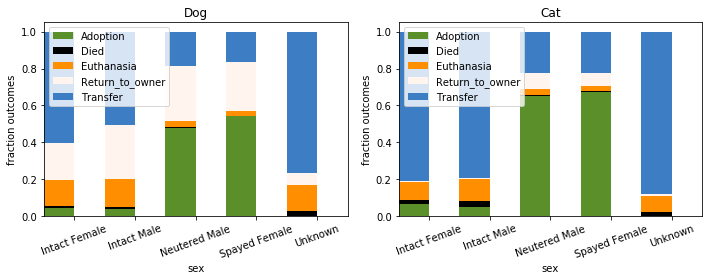

In [9]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.title('Dog')
plt.xlabel('sex')
plt.ylabel('fraction outcomes')
plt.xlim([-0.5,4.5])
plt1 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_dog[:,0], 0.5,color='#5A8F29')
plt2 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_dog[:,1], 0.5,color='k',bottom = np.sum(fractions_dog[:,:1],axis=1))
plt3 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_dog[:,2], 0.5,color='#FF8F00',bottom = np.sum(fractions_dog[:,:2],axis=1))
plt4 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_dog[:,3], 0.5,color='#FFF5EE',bottom = np.sum(fractions_dog[:,:3],axis=1))
plt5 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_dog[:,4], 0.5,color='#3C7DC4',bottom = np.sum(fractions_dog[:,:4],axis=1))
plt.legend([plt1,plt2,plt3,plt4,plt5],unique_outcomes,loc=2,fontsize=10)
plt.xticks(range(len(unique_sexes)), unique_sexes, rotation=20)

plt.subplot(1, 2, 2)
plt.title('Cat')
plt.xlabel('sex')
plt.ylabel('fraction outcomes')
plt.xlim([-0.5,4.5])
plt1 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_cat[:,0], 0.5,color='#5A8F29')
plt2 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_cat[:,1], 0.5,color='k',bottom = np.sum(fractions_cat[:,:1],axis=1))
plt3 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_cat[:,2], 0.5,color='#FF8F00',bottom = np.sum(fractions_cat[:,:2],axis=1))
plt4 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_cat[:,3], 0.5,color='#FFF5EE',bottom = np.sum(fractions_cat[:,:3],axis=1))
plt5 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_cat[:,4], 0.5,color='#3C7DC4',bottom = np.sum(fractions_cat[:,:4],axis=1))
plt.legend([plt1,plt2,plt3,plt4,plt5],unique_outcomes,loc=2,fontsize=10)
plt.xticks(range(len(unique_sexes)), unique_sexes, rotation=20)
plt.tight_layout()
plt.savefig('gender-vs-outcome.jpg',dpi=150)
plt.show()

- Dogs in general are more likely to be returned to their owner than cats.
- Intact males/females are less likely to get adopted.

The last point is potentially actionable. If it is possible and not too expensive to neuter/spay the incoming animals, their probability of adoption would go from ~5% to ~50% for dogs and more than 60% for cats.

Question 3: breed vs. outcome?

In [10]:
# Load data
feature = 'Breed'

feature_values_dog = df.loc[df['AnimalType'] == 'Dog',feature]
outcome_dog = df.loc[df['AnimalType'] == 'Dog','OutcomeType']

feature_values_cat = df.loc[df['AnimalType'] == 'Cat',feature]
outcome_cat = df.loc[df['AnimalType'] == 'Cat','OutcomeType']

In [11]:
# collect unique breeds:
# split up mixed breeds and merge the sublists
feature_values = [i.split('/') for i in feature_values_dog]
feature_values = [j for i in feature_values for j in i]
# remove 'Mix' from the strings, but add it as a unique element
feature_values = [i == i[:-4] if i[-3:] == 'Mix' else i for i in feature_values]
feature_values = feature_values + ['Mix']
unique_breeds_dog = np.unique(feature_values)

# same for cats
feature_values = [i.split('/') for i in feature_values_cat]
feature_values = [j for i in feature_values for j in i]
# remove 'Mix' from the strings, but add it as a unique element
feature_values = [i == i[:-4] if i[-3:] == 'Mix' else i for i in feature_values]
feature_values = feature_values + ['Mix']
unique_breeds_cat = np.unique(feature_values)

# unique outcomes:
unique_outcomes = np.unique(np.append(outcome_dog,outcome_cat))


In [12]:
# arrays to fill
fractions_cat = np.zeros([len(unique_breeds_cat),len(unique_outcomes)])
fractions_dog = np.zeros([len(unique_breeds_dog),len(unique_outcomes)])
nr_animals_with_breed_dog = np.zeros(len(unique_breeds_dog))
nr_animals_with_breed_cat = np.zeros(len(unique_breeds_cat))

for i in range(len(unique_breeds_dog)):
    sublist_dog = outcome_dog[[unique_breeds_dog[i] in x for x in feature_values_dog]]
    
    for j in range(len(unique_outcomes)):
        if len(sublist_dog) > 0:
            fractions_dog[i,j] = 1e0*len(sublist_dog[sublist_dog == unique_outcomes[j]]) / len(sublist_dog)
        else:
            fractions_dog[i,j] = 0e0
    nr_animals_with_breed_dog[i] = len(sublist_dog)
    
for i in range(len(unique_breeds_cat)):
    sublist_cat = outcome_cat[[unique_breeds_cat[i] in x for x in feature_values_cat]]
    for j in range(len(unique_outcomes)):
        if len(sublist_cat) > 0:
            fractions_cat[i,j] = 1e0*len(sublist_cat[sublist_cat == unique_outcomes[j]]) / len(sublist_cat)
        else:
            fractions_cat[i,j] = 0e0
    nr_animals_with_breed_cat[i] = len(sublist_cat)


In [13]:
# sort the dog and cat fractions with respect to nr. of animals in train.csv
indcs_dog = np.argsort(nr_animals_with_breed_dog)
fractions_dog = fractions_dog[indcs_dog]

indcs_cat = np.argsort(nr_animals_with_breed_cat)
fractions_cat = fractions_cat[indcs_cat]

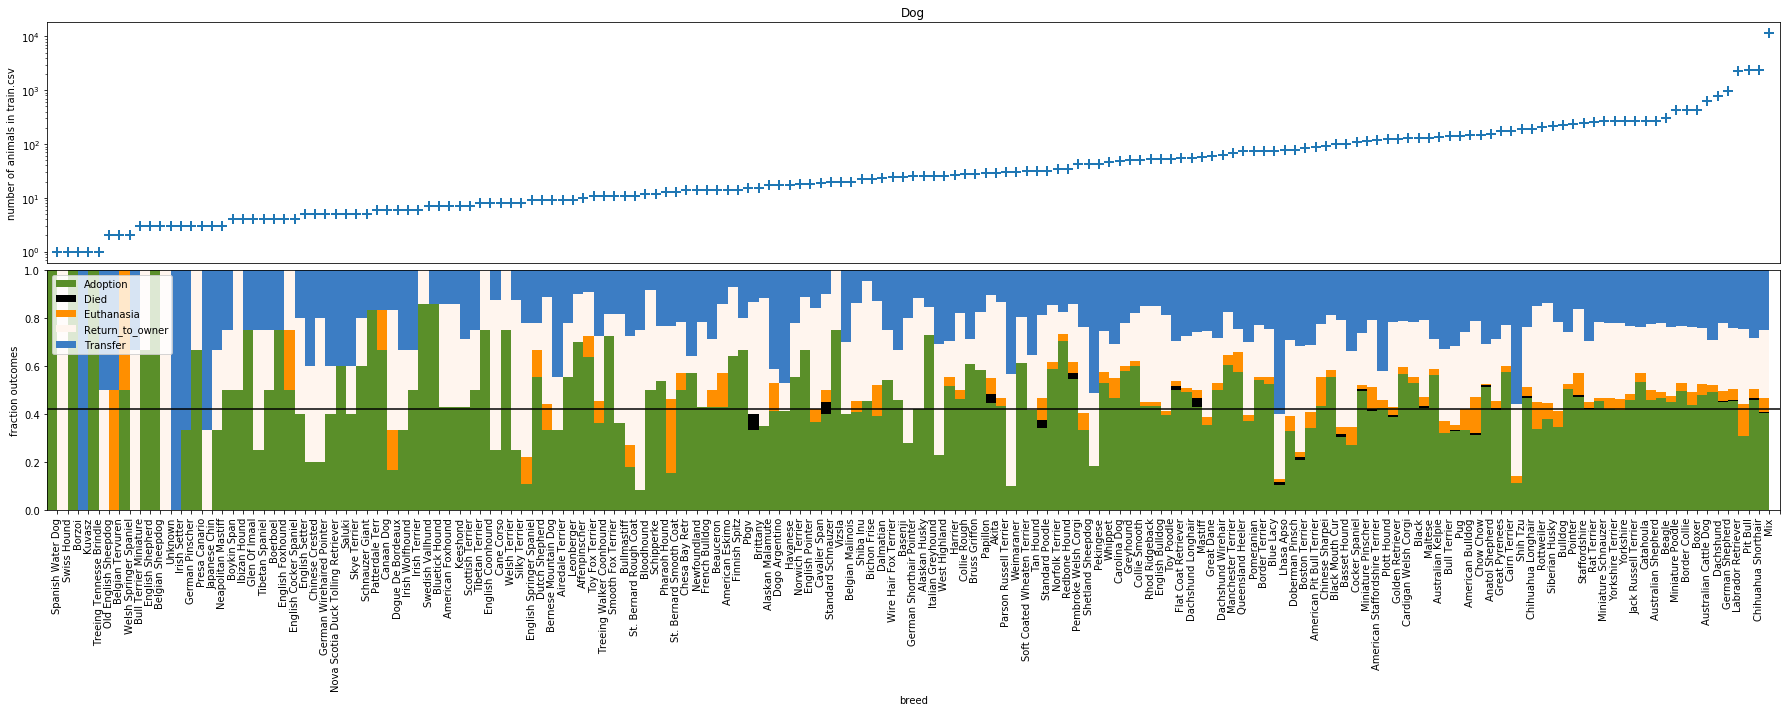

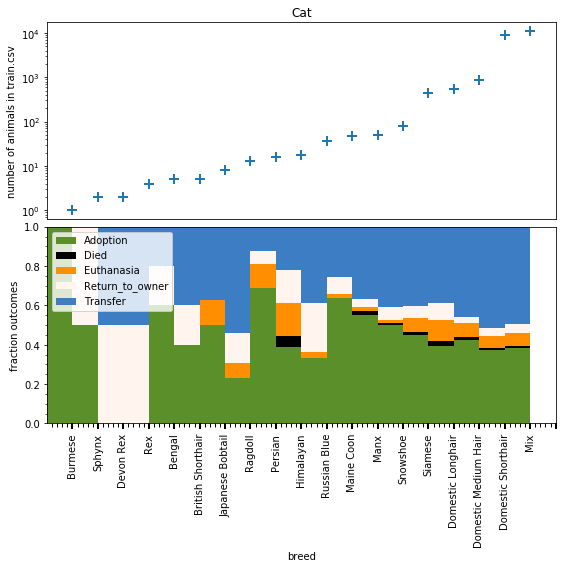

In [14]:
# plot figures

plt.figure(figsize=(25,10))

plt.subplot(2,1,1)
plt.title('Dog')
plt.yscale('log')
plt.xticks([])
plt.xlim([0,len(unique_breeds_dog)])
plt.plot(range(len(unique_breeds_dog)),nr_animals_with_breed_dog[indcs_dog],'+',markersize=10,mew=2)
plt.ylabel('number of animals in train.csv')
plt.tick_params(axis='x', length=6, which='major',width=2)
plt.tick_params(axis='x', length=4, which='minor',width=1)
plt.minorticks_on()

plt.subplot(2,1,2)
plt.xlabel('breed')
plt.ylabel('fraction outcomes')
plt.xlim([0,len(unique_breeds_dog)])
plt.ylim([0,1])
plt.plot(np.arange(len(unique_breeds_dog)+2),np.zeros(len(unique_breeds_dog)+2)+np.average(fractions_dog[:,0],weights = nr_animals_with_breed_dog[indcs_dog]),'k')
plt1 = plt.bar(np.arange(len(unique_breeds_dog))-0.5, fractions_dog[:,0], 1,color='#5A8F29',edgecolor='none')
plt2 = plt.bar(np.arange(len(unique_breeds_dog))-0.5, fractions_dog[:,1], 1,color='k',bottom = np.sum(fractions_dog[:,:1],axis=1),edgecolor='none')
plt3 = plt.bar(np.arange(len(unique_breeds_dog))-0.5, fractions_dog[:,2], 1,color='#FF8F00',bottom = np.sum(fractions_dog[:,:2],axis=1),edgecolor='none')
plt4 = plt.bar(np.arange(len(unique_breeds_dog))-0.5, fractions_dog[:,3], 1,color='#FFF5EE',bottom = np.sum(fractions_dog[:,:3],axis=1),edgecolor='none')
plt5 = plt.bar(np.arange(len(unique_breeds_dog))-0.5, fractions_dog[:,4], 1,color='#3C7DC4',bottom = np.sum(fractions_dog[:,:4],axis=1),edgecolor='none')
plt.xticks(np.arange(len(unique_breeds_dog))+1, unique_breeds_dog[indcs_dog[1:]], rotation=90)
plt.legend([plt1,plt2,plt3,plt4,plt5],unique_outcomes,loc=2,fontsize=10)
plt.tight_layout(w_pad=0, h_pad=0)
plt.savefig('breed-vs-outcome_dog.jpg',dpi=150)
plt.show()
plt.close()


plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.title('Cat')
plt.yscale('log')
plt.xticks([])
plt.xlim([0,len(unique_breeds_cat)])
plt.plot(range(len(unique_breeds_cat)),nr_animals_with_breed_cat[indcs_cat[0:]],'+',markersize=10,mew=2)
plt.ylabel('number of animals in train.csv')
plt.tight_layout(w_pad=0, h_pad=0)

plt.subplot(2,1,2)
plt.xlabel('breed')
plt.ylabel('fraction outcomes')
plt.xlim([0,len(unique_breeds_cat)])
plt.ylim([0,1])
plt1 = plt.bar(np.arange(len(unique_breeds_cat))-0.5, fractions_cat[:,0], 1,color='#5A8F29',edgecolor='none')
plt2 = plt.bar(np.arange(len(unique_breeds_cat))-0.5, fractions_cat[:,1], 1,color='k',bottom = np.sum(fractions_cat[:,:1],axis=1),edgecolor='none')
plt3 = plt.bar(np.arange(len(unique_breeds_cat))-0.5, fractions_cat[:,2], 1,color='#FF8F00',bottom = np.sum(fractions_cat[:,:2],axis=1),edgecolor='none')
plt4 = plt.bar(np.arange(len(unique_breeds_cat))-0.5, fractions_cat[:,3], 1,color='#FFF5EE',bottom = np.sum(fractions_cat[:,:3],axis=1),edgecolor='none')
plt5 = plt.bar(np.arange(len(unique_breeds_cat))-0.5, fractions_cat[:,4], 1,color='#3C7DC4',bottom = np.sum(fractions_cat[:,:4],axis=1),edgecolor='none')
plt.legend([plt1,plt2,plt3,plt4,plt5],unique_outcomes,loc=2,fontsize=10)
plt.xticks(np.arange(len(unique_breeds_cat))+1, unique_breeds_cat[indcs_cat[1:]], rotation=90)
plt.tick_params(axis='x', length=6, which='major',width=2)
plt.tick_params(axis='x', length=4, which='minor',width=1)
plt.minorticks_on()
plt.tight_layout(w_pad=0, h_pad=0)
plt.savefig('breed-vs-outcome_cat.jpg',dpi=150)
plt.show()
plt.close()

- Some small dogs (e.g., Shin Tzus, Lhasa Apsos, Pekingese) have a very low adoption probability (~10% while the average is ~40%). 
- Dogs percieved agressive (Pit Bulls, Bull Dogs, Siberian Huskies, Rottweilers) also have a lower than average adoption probability (~30%).

The black line on breed-vs-outcome_dog shows the weighted average adoption probability.

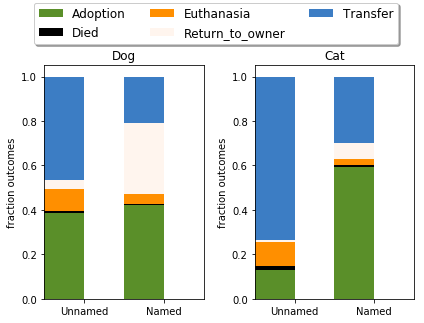

In [15]:
# check the name feature vs outcomes

feature = 'Name'

feature_values_dog = df.loc[df['AnimalType'] == 'Dog',feature]
outcome_dog = df.loc[df['AnimalType'] == 'Dog','OutcomeType']
outcome_dog = np.array(outcome_dog)

feature_values_cat = df.loc[df['AnimalType'] == 'Cat',feature]
outcome_cat = df.loc[df['AnimalType'] == 'Cat','OutcomeType']
outcome_cat = np.array(outcome_cat)

# unique outcomes:
unique_outcomes = np.unique(outcome_dog)

fraction_outcomes_cat = np.zeros([2,5])
fraction_outcomes_dog = np.zeros([2,5])


for i in range(len(unique_outcomes)):
    cat_noname = np.sum(feature_values_cat[outcome_cat == unique_outcomes[i]].isnull())
    cat_with_name = np.sum(feature_values_cat[outcome_cat == unique_outcomes[i]].notnull())
    dog_noname = np.sum(feature_values_dog[outcome_dog == unique_outcomes[i]].isnull())
    dog_with_name = np.sum(feature_values_dog[outcome_dog == unique_outcomes[i]].notnull())
    
    fraction_outcomes_cat[0,i] = 1e0*cat_noname/np.sum(feature_values_cat.isnull())
    fraction_outcomes_cat[1,i] = 1e0*cat_with_name/np.sum(feature_values_cat.notnull())

    fraction_outcomes_dog[0,i] = 1e0*dog_noname/np.sum(feature_values_dog.isnull())
    fraction_outcomes_dog[1,i] = 1e0*dog_with_name/np.sum(feature_values_dog.notnull())

# plot
plt.figure(figsize=(6,4))

plt.subplot(1, 2, 1)
plt.title('Dog')
plt.ylabel('fraction outcomes')
plt.xlim([-0.5,1.5])
plt1 = plt.bar(np.arange(2)-0.25, fraction_outcomes_dog[:,0], 0.5,color='#5A8F29')
plt2 = plt.bar(np.arange(2)-0.25, fraction_outcomes_dog[:,1], 0.5,color='k',bottom = np.sum(fraction_outcomes_dog[:,:1],axis=1))
plt3 = plt.bar(np.arange(2)-0.25, fraction_outcomes_dog[:,2], 0.5,color='#FF8F00',bottom = np.sum(fraction_outcomes_dog[:,:2],axis=1))
plt4 = plt.bar(np.arange(2)-0.25, fraction_outcomes_dog[:,3], 0.5,color='#FFF5EE',bottom = np.sum(fraction_outcomes_dog[:,:3],axis=1))
plt5 = plt.bar(np.arange(2)-0.25, fraction_outcomes_dog[:,4], 0.5,color='#3C7DC4',bottom = np.sum(fraction_outcomes_dog[:,:4],axis=1))
plt.xticks(range(2), ['Unnamed','Named'], rotation=0)

plt.subplot(1, 2, 2)
plt.title('Cat')
plt.ylabel('fraction outcomes')
plt.xlim([-0.5,1.5])
plt1 = plt.bar(np.arange(2)-0.25, fraction_outcomes_cat[:,0], 0.5,color='#5A8F29')
plt2 = plt.bar(np.arange(2)-0.25, fraction_outcomes_cat[:,1], 0.5,color='k',bottom = np.sum(fraction_outcomes_cat[:,:1],axis=1))
plt3 = plt.bar(np.arange(2)-0.25, fraction_outcomes_cat[:,2], 0.5,color='#FF8F00',bottom = np.sum(fraction_outcomes_cat[:,:2],axis=1))
plt4 = plt.bar(np.arange(2)-0.25, fraction_outcomes_cat[:,3], 0.5,color='#FFF5EE',bottom = np.sum(fraction_outcomes_cat[:,:3],axis=1))
plt5 = plt.bar(np.arange(2)-0.25, fraction_outcomes_cat[:,4], 0.5,color='#3C7DC4',bottom = np.sum(fraction_outcomes_cat[:,:4],axis=1))
plt.xticks(range(2), ['Unnamed','Named'], rotation=0)

plt.figlegend([plt1,plt2,plt3,plt4,plt5],unique_outcomes,loc='center',fontsize=12,bbox_to_anchor=(0.5, 1.04),
          ncol=3, fancybox=True, shadow=True)

plt.tight_layout()
plt.savefig('outcome-vs-name.jpg',bbox_inches='tight',dpi=150)
plt.show()
plt.close()


- Dogs with names are more likely to returned to their owner. 
- For both animals, euthanasia is more likely if they are unnamed.
- Cats are ~4 times more likely to get adopted if they are named.

The last point is explained by the large number of neonatal cats which are unnamed and not adoptable, thus this correlation is not actionable. For more details, see Fig. 1 of my blog post:

https://andraszsom.wordpress.com/2016/07/27/kaggle-for-the-paws/